_____________________________

# ANN

___________________________

In [1]:
import numpy as np
import pandas as pd

In [2]:
CleanCreditScoring = pd.read_csv('CleanCreditScoring.csv')

In [3]:
print("Dimensi Data : ", CleanCreditScoring.shape,"\n")
print("Tipe Data :\n ",CleanCreditScoring.dtypes,"\n")
print("Data Hilang :\n ",CleanCreditScoring.isnull().sum())

Dimensi Data :  (4446, 27) 

Tipe Data :
  Status         object
Seniority       int64
Home           object
Time            int64
Age             int64
Marital        object
Records        object
Job            object
Expenses        int64
Income          int64
Assets          int64
Debt            int64
Amount          int64
Price           int64
Finrat        float64
Savings       float64
seniorityR     object
timeR          object
ageR           object
expensesR      object
incomeR        object
assetsR        object
debtR          object
amountR        object
priceR         object
finratR        object
savingsR       object
dtype: object 

Data Hilang :
  Status        0
Seniority     0
Home          0
Time          0
Age           0
Marital       0
Records       0
Job           0
Expenses      0
Income        0
Assets        0
Debt          0
Amount        0
Price         0
Finrat        0
Savings       0
seniorityR    0
timeR         0
ageR          0
expensesR     0
incomeR    

In [4]:
CleanCreditScoring.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,...,timeR,ageR,expensesR,incomeR,assetsR,debtR,amountR,priceR,finratR,savingsR
0,good,9,rent,60,30,married,no_rec,freelance,73,129,...,"time (48,99]","age (25,30]","exp (60,80]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (600,900]","priz (0,1e+03]","finr (90,100]","sav (4,6]"
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,...,"time (48,99]","age (50,99]","exp (40,50]","inc (110,140]","asset (-1,0]","debt (-1,0]","am (900,1.1e+03]","priz (1.5e+03,1.8e+03]","finr (50,70]","sav (4,6]"
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,...,"time (24,36]","age (40,50]","exp (80,1e+04]","inc (190,1e+04]","asset (0,3e+03]","debt (-1,0]","am (1.4e+03,1e+05]","priz (1.8e+03,1e+05]","finr (50,70]","sav (0,2]"
3,good,0,rent,60,24,single,no_rec,fixed,63,182,...,"time (48,99]","age (0,25]","exp (60,80]","inc (140,190]","asset (0,3e+03]","debt (-1,0]","am (600,900]","priz (1.3e+03,1.5e+03]","finr (50,70]","sav (6,99]"
4,good,0,rent,36,26,single,no_rec,fixed,46,107,...,"time (24,36]","age (25,30]","exp (40,50]","inc (80,110]","asset (-1,0]","debt (-1,0]","am (0,600]","priz (0,1e+03]","finr (0,50]","sav (6,99]"


_____________________

# EKSPLORASI DATA

______________

# Peubah Respon

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

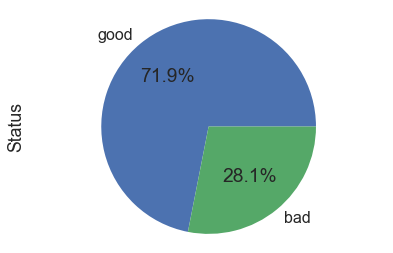

In [6]:
#mengatur ukuran huruf
sns.set_context("paper", font_scale=2)

pd.value_counts(CleanCreditScoring['Status']).plot(kind='pie',autopct='%1.1f%%')

plt.axis('equal')
plt.show()

# Peubah Kategorik

In [7]:
KATEGORIK=list(CleanCreditScoring.columns[CleanCreditScoring.dtypes==object])
print(KATEGORIK,"\n")
print(len(KATEGORIK),"\n")

['Status', 'Home', 'Marital', 'Records', 'Job', 'seniorityR', 'timeR', 'ageR', 'expensesR', 'incomeR', 'assetsR', 'debtR', 'amountR', 'priceR', 'finratR', 'savingsR'] 

16 



In [8]:
for i in KATEGORIK:
    print(CleanCreditScoring[i].value_counts(),"\n")

good    3197
bad     1249
Name: Status, dtype: int64 

owner      2106
rent        973
parents     782
other       319
priv        246
ignore       20
Name: Home, dtype: int64 

married      3238
single        973
separated     130
widow          67
divorced       38
Name: Marital, dtype: int64 

no_rec     3677
yes_rec     769
Name: Records, dtype: int64 

fixed        2803
freelance    1021
partime       451
others        171
Name: Job, dtype: int64 

sen (-1,1]     1042
sen (3,8]       978
sen (14,99]     880
sen (1,3]       789
sen (8,14]      757
Name: seniorityR, dtype: int64 

time (48,99]    1949
time (24,36]     991
time (36,48]     885
time (12,24]     441
time (0,12]      180
Name: timeR, dtype: int64 

age (30,40]    1415
age (40,50]     900
age (25,30]     781
age (0,25]      699
age (50,99]     651
Name: ageR, dtype: int64 

exp (0,40]        1219
exp (40,50]        999
exp (50,60]        979
exp (60,80]        798
exp (80,1e+04]     451
Name: expensesR, dtype: int64 

in

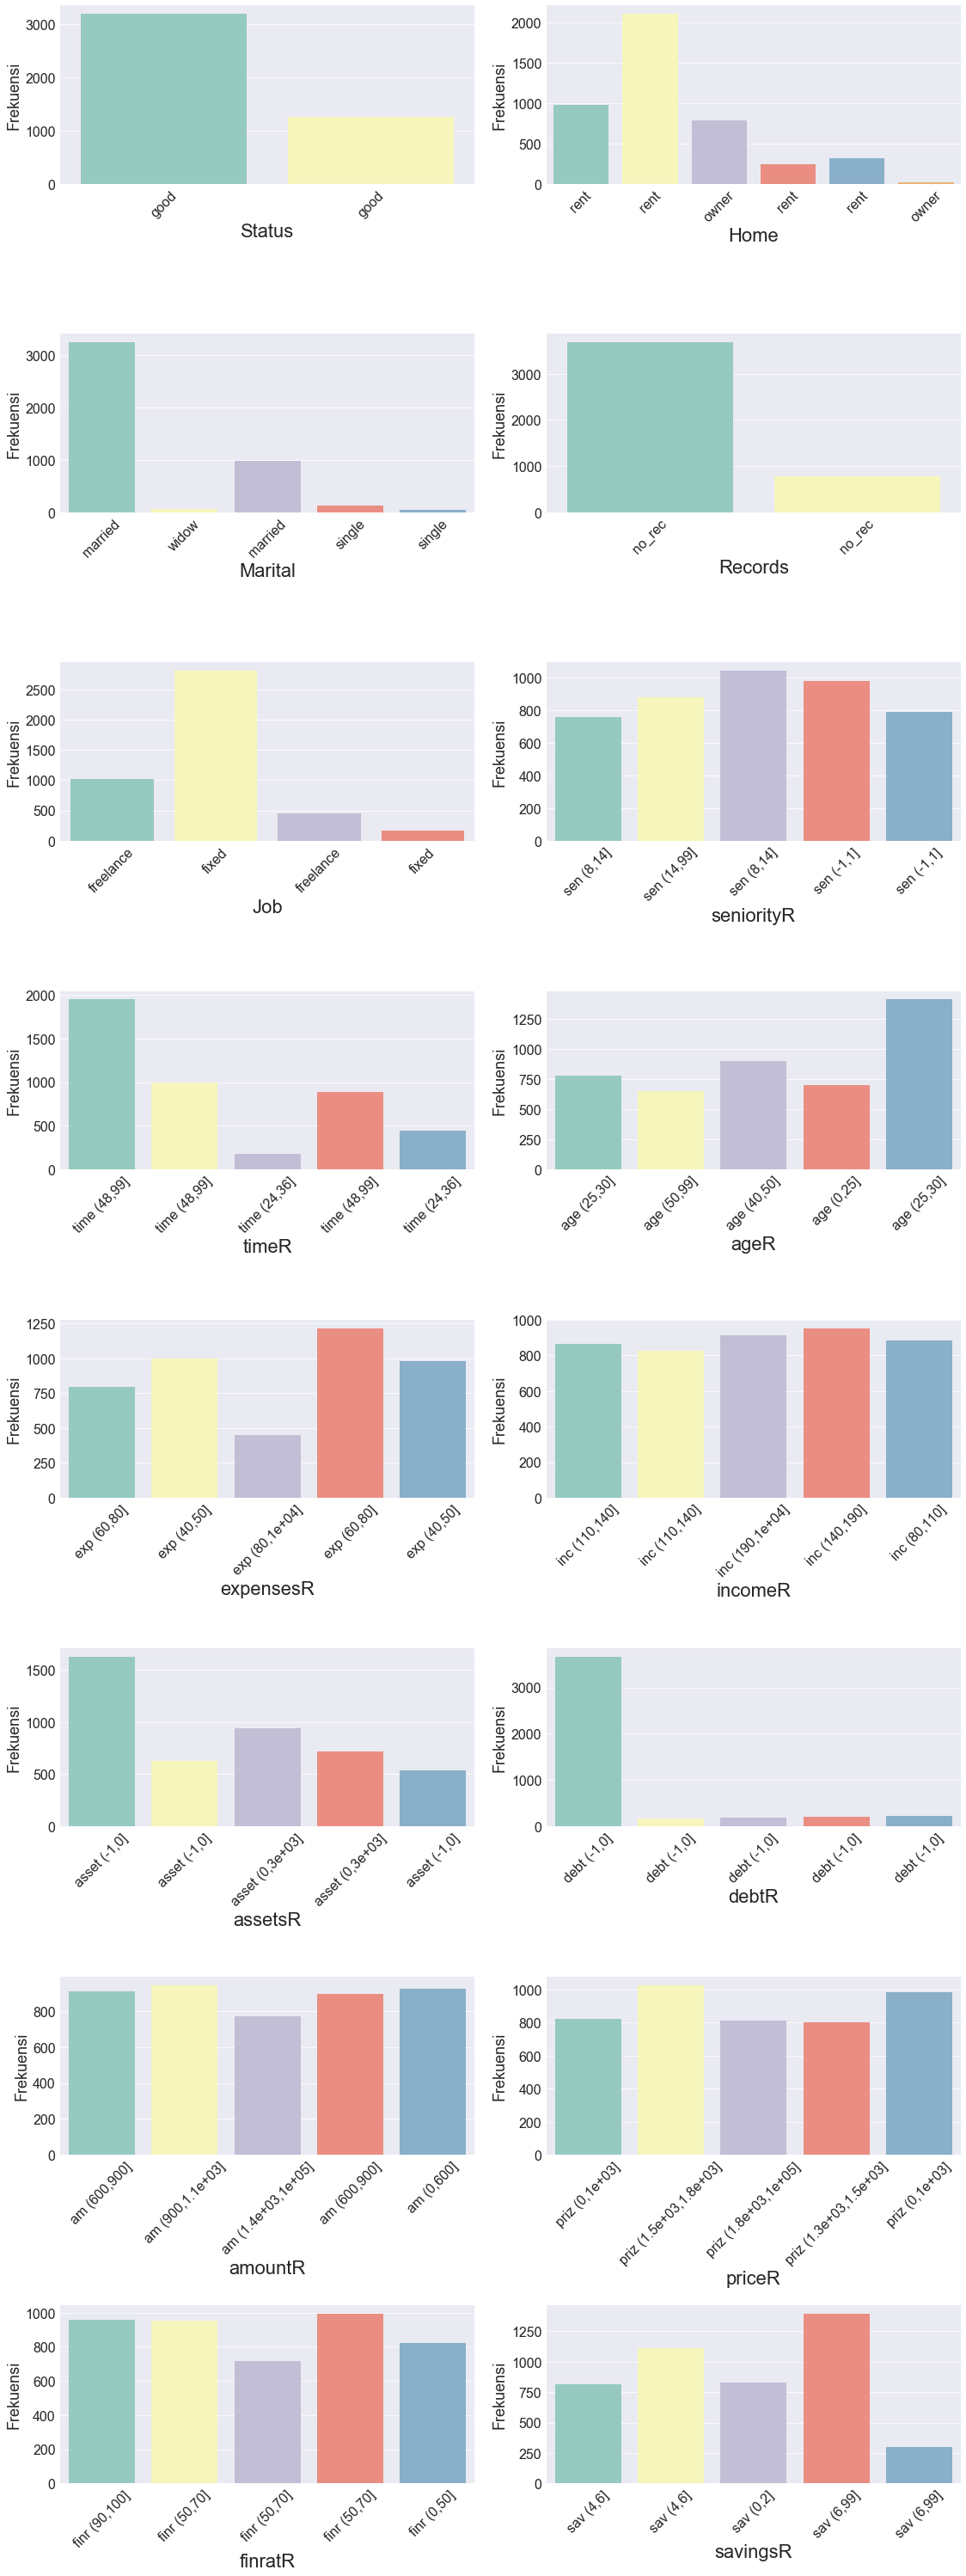

In [9]:
# membuat barchart dengan looping

# menyediakan sejumlah jendela
fig, axes = plt.subplots(8,2,sharey=False)

# mengatur ukuran jendela
fig.set_size_inches(16,42)

#mengatur ukuran huruf
sns.set_context("paper", font_scale=2)

# mengubah orientasi penomoran pada jendela
ax = axes.ravel()

# pembuatan gambar menggunakan looping
for i in range(len(KATEGORIK)):
    sns.countplot(x=KATEGORIK[i],data=CleanCreditScoring,palette="Set3",ax=ax[i])
    ax[i].set_xlabel(KATEGORIK[i],fontsize=22)
    ax[i].set_ylabel("Frekuensi",fontsize=18)
    ax[i].set_xticklabels(CleanCreditScoring[KATEGORIK[i]],rotation=45)

# mengatur jarak pada jendela secara otomatis
plt.tight_layout()

# memunculkan hasl
fig

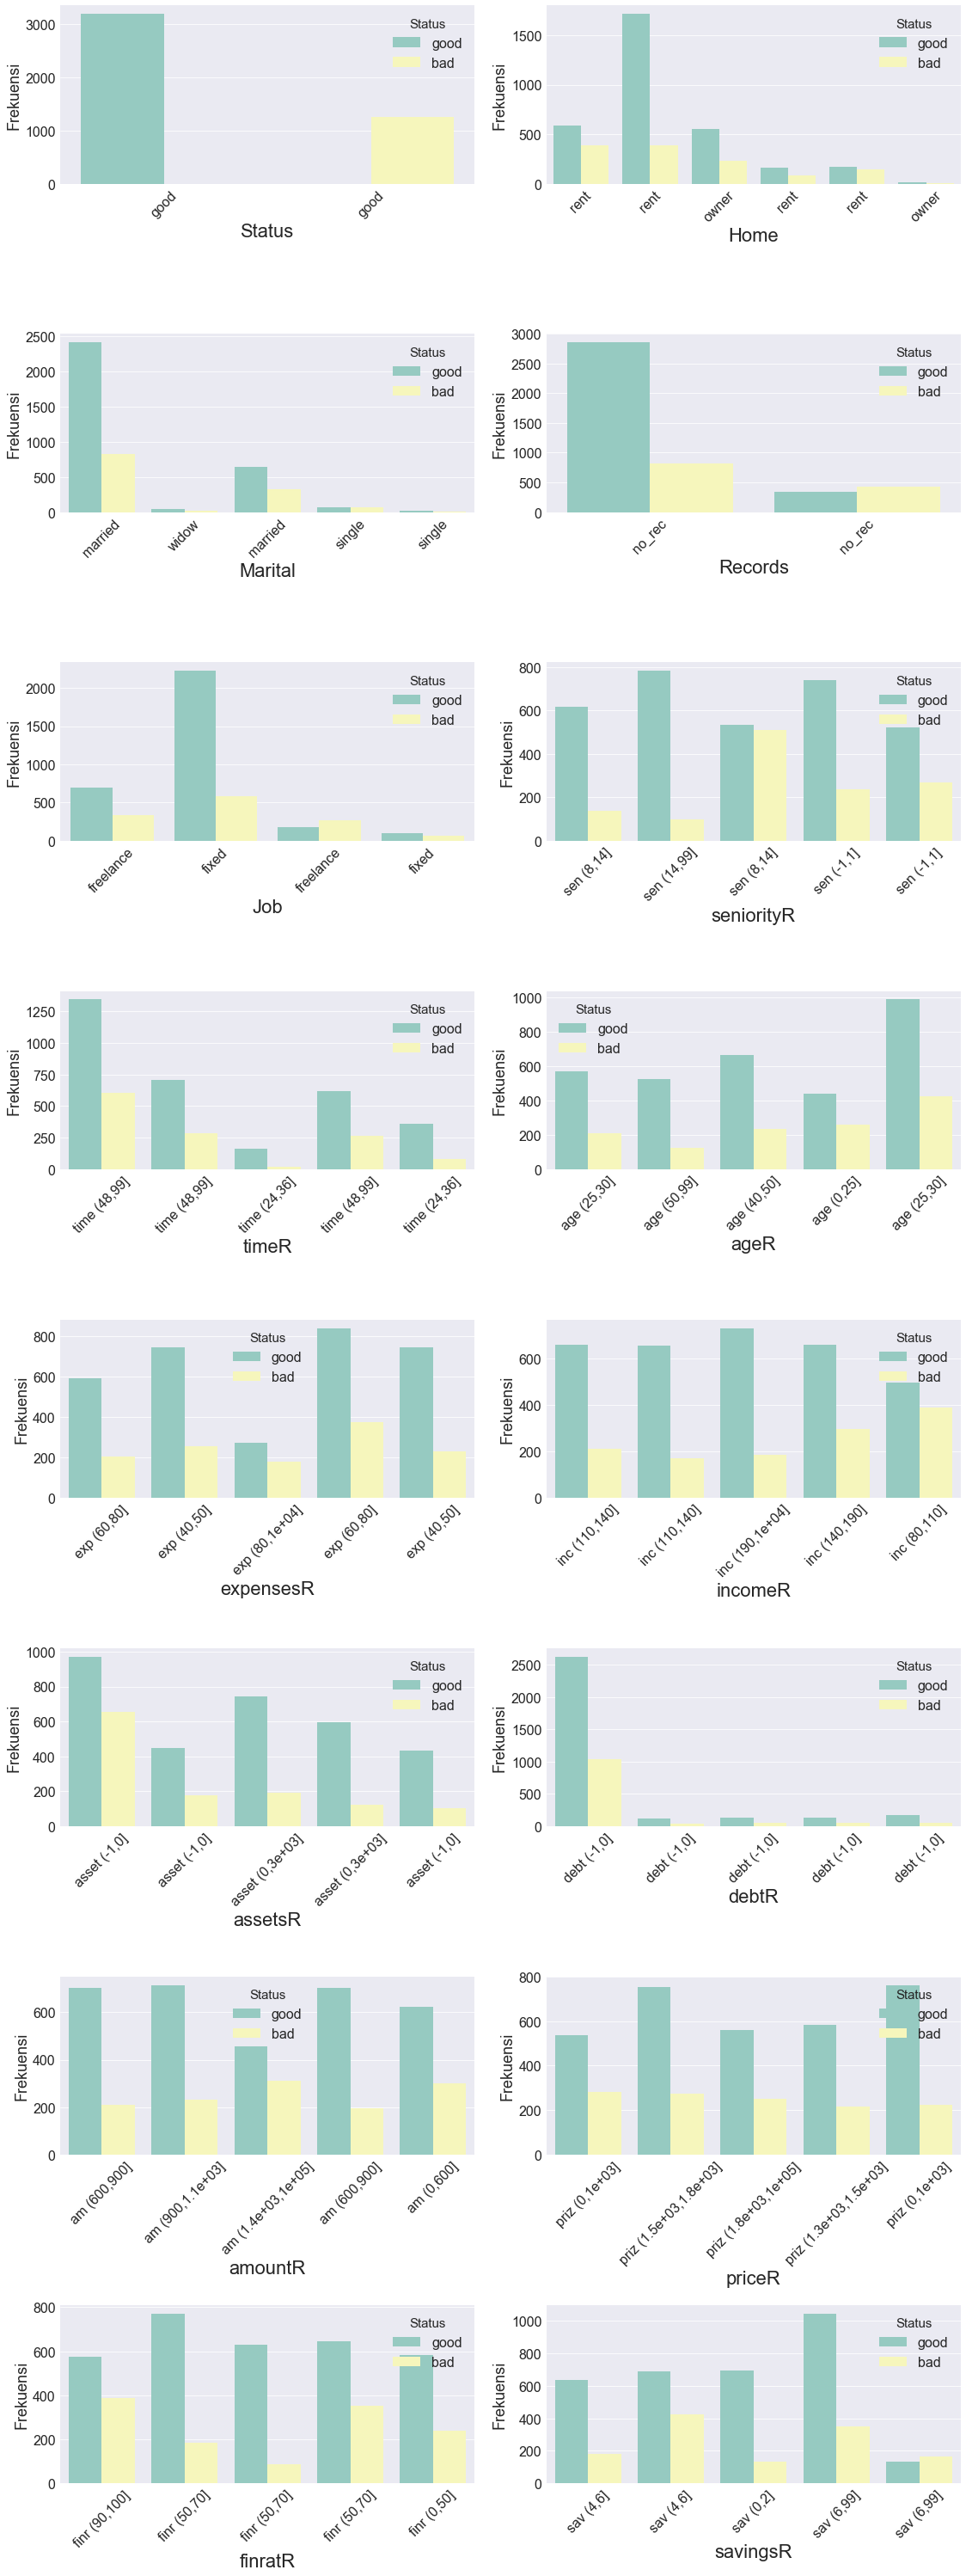

In [10]:
# membuat barchart dengan looping

# menyediakan sejumlah jendela
fig, axes = plt.subplots(8,2,sharey=False)

# mengatur ukuran jendela
fig.set_size_inches(16,42)

#mengatur ukuran huruf
sns.set_context("paper", font_scale=2)

# mengubah orientasi penomoran pada jendela
ax = axes.ravel()

# pembuatan gambar menggunakan looping
for i in range(len(KATEGORIK)):
    sns.countplot(x=KATEGORIK[i],data=CleanCreditScoring,hue='Status',palette="Set3",ax=ax[i])
    ax[i].set_xlabel(KATEGORIK[i],fontsize=22)
    ax[i].set_ylabel("Frekuensi",fontsize=18)
    ax[i].set_xticklabels(CleanCreditScoring[KATEGORIK[i]],rotation=45)

# mengatur jarak pada jendela secara otomatis
plt.tight_layout()

# memunculkan hasl
fig

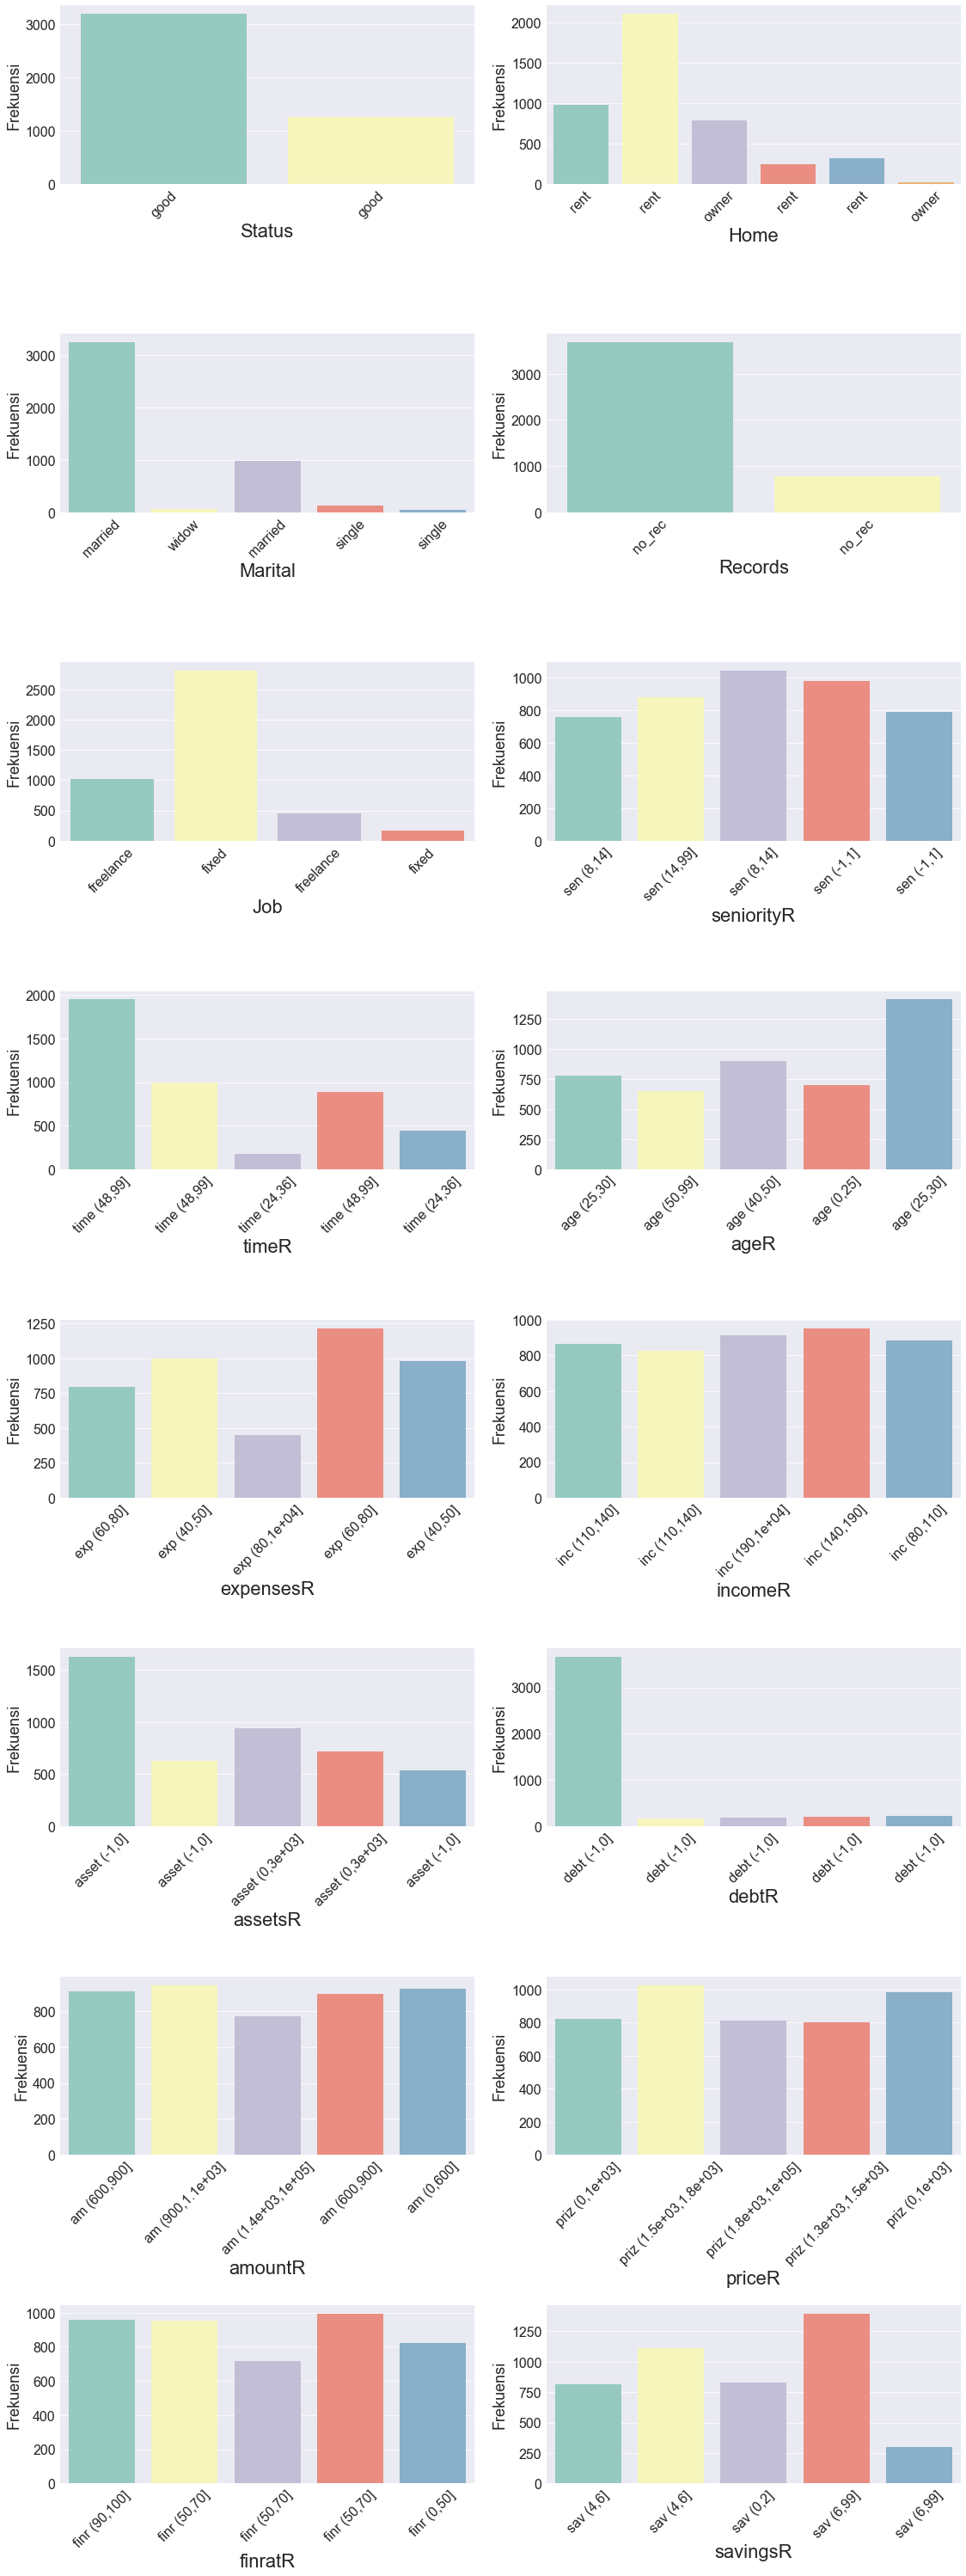

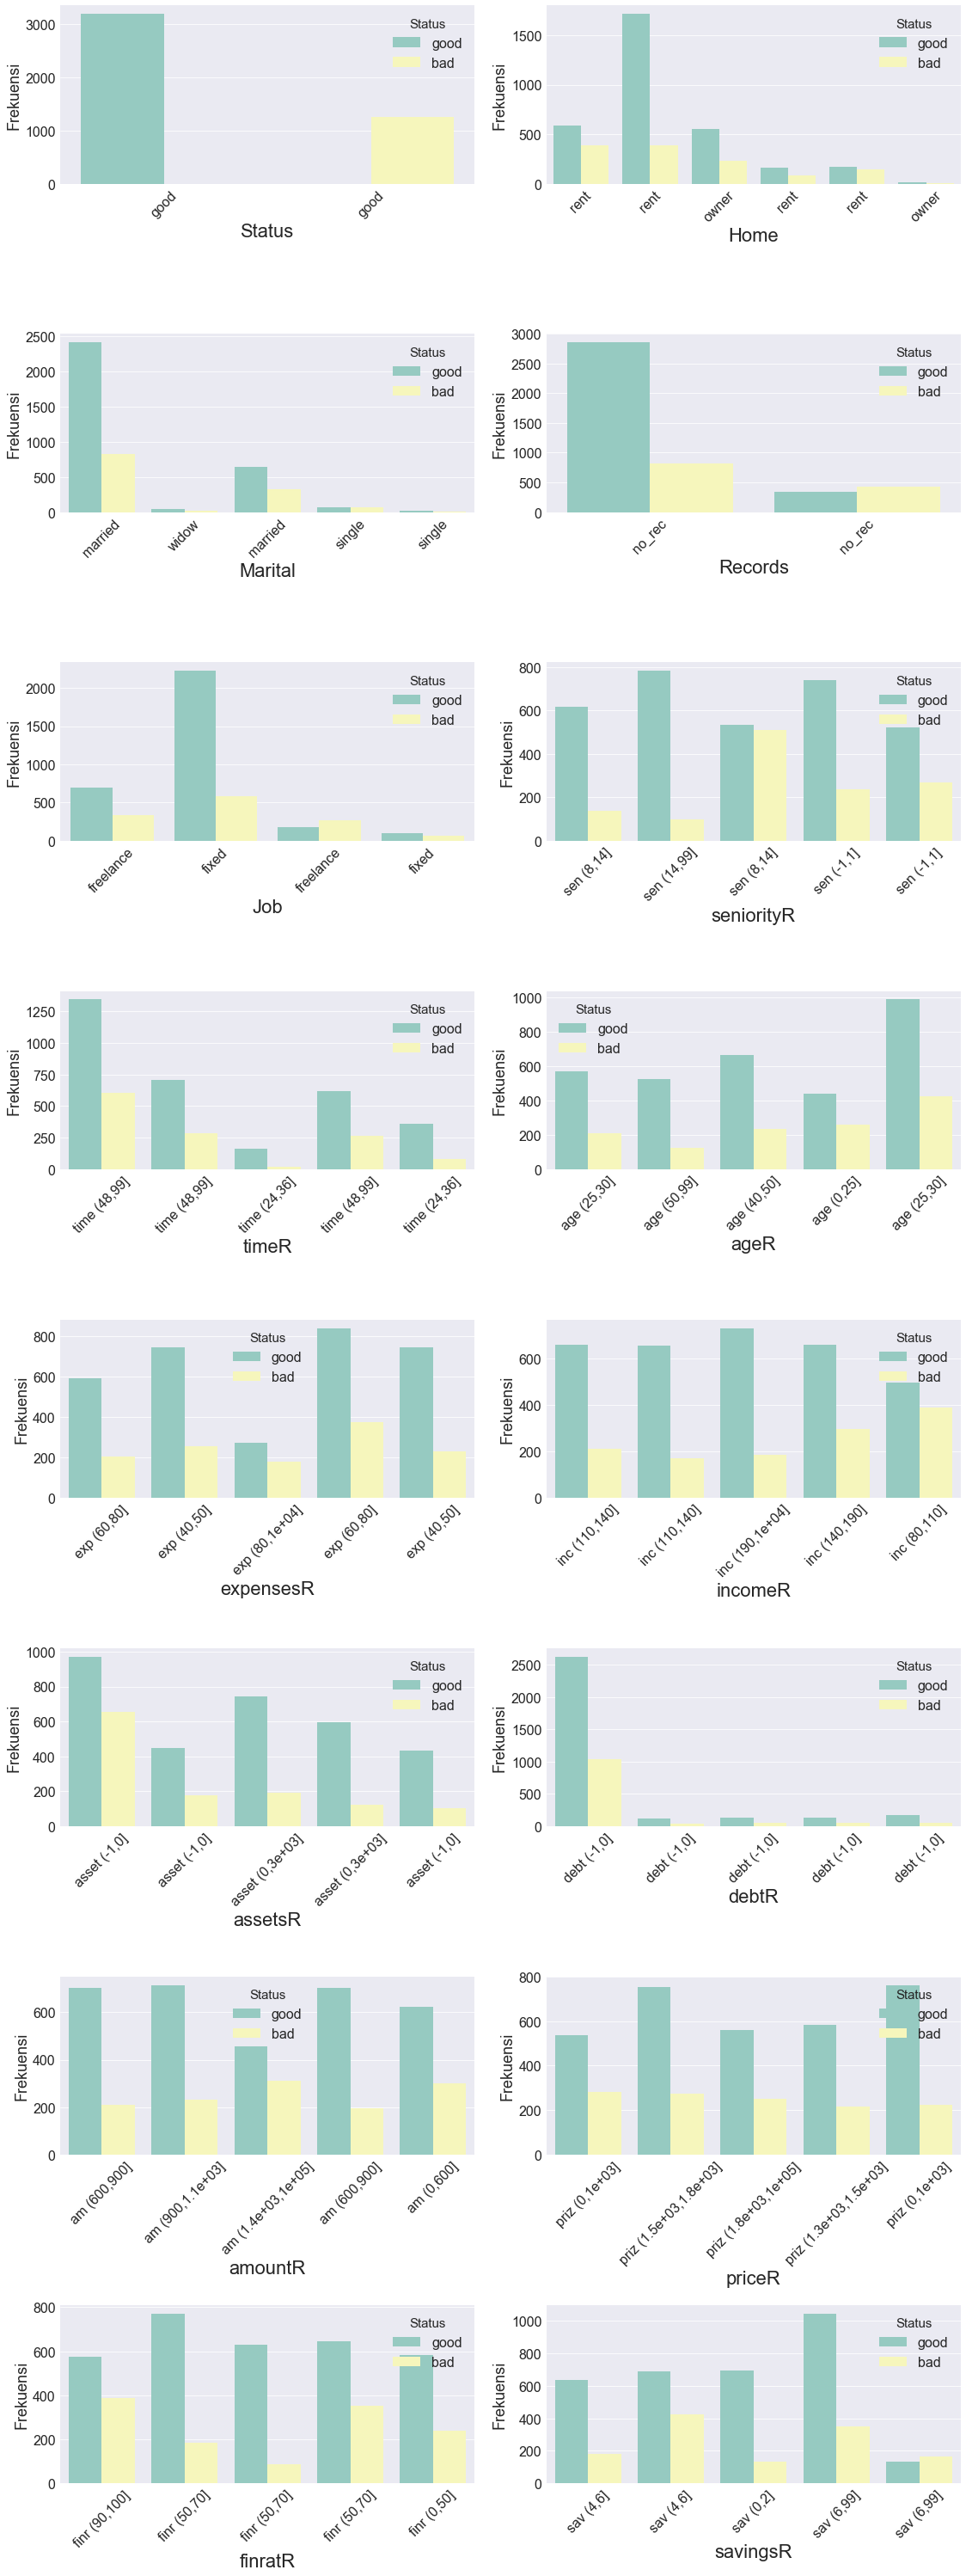

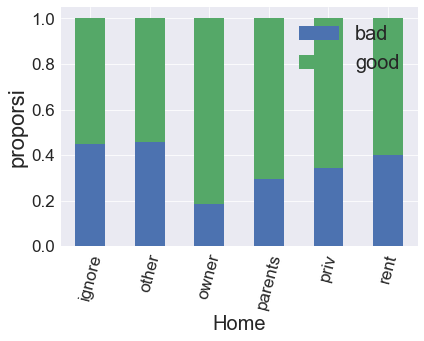

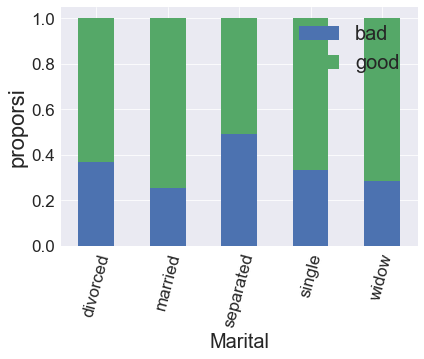

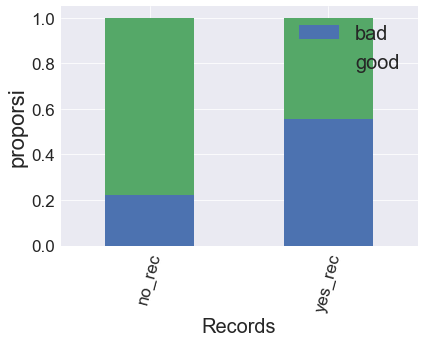

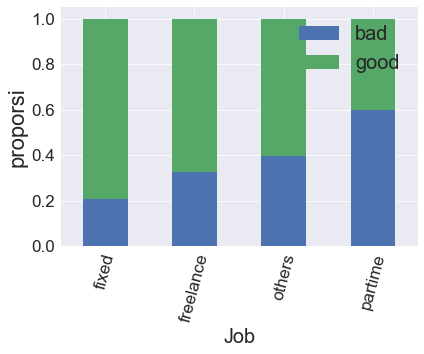

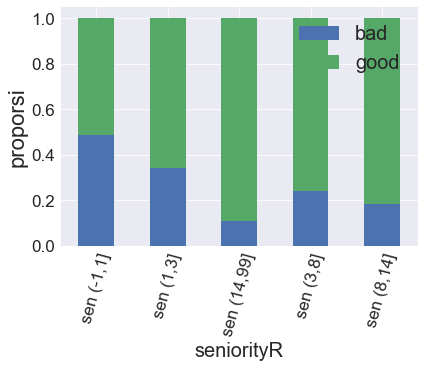

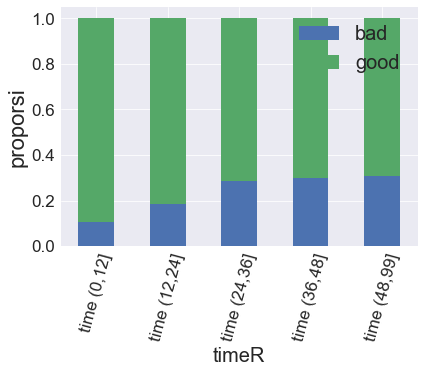

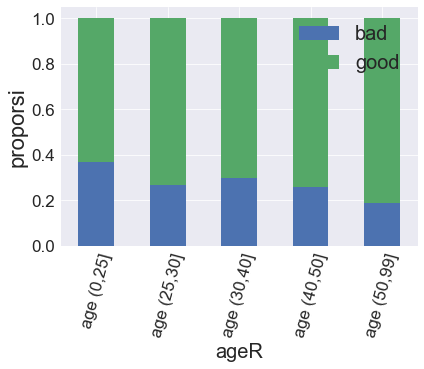

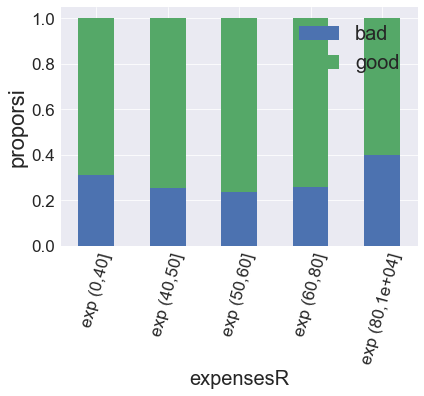

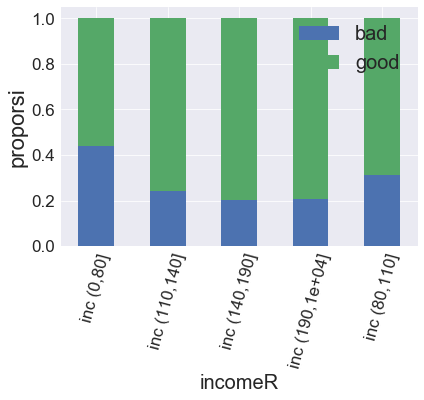

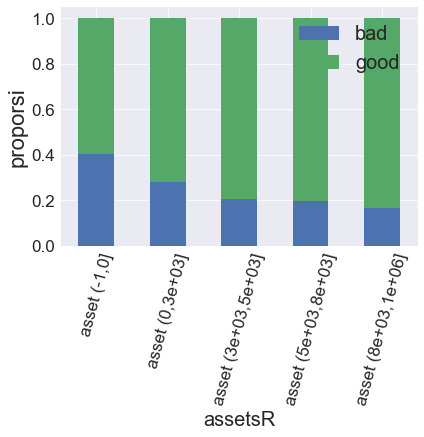

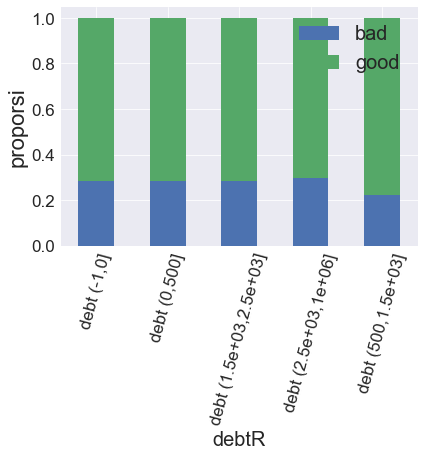

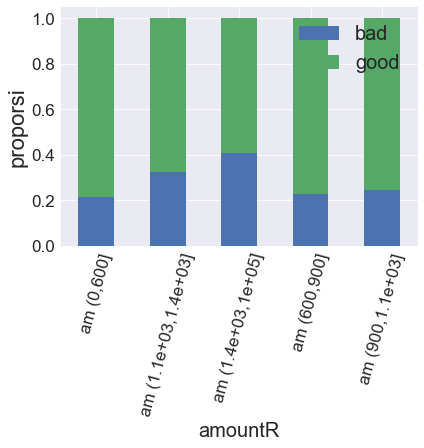

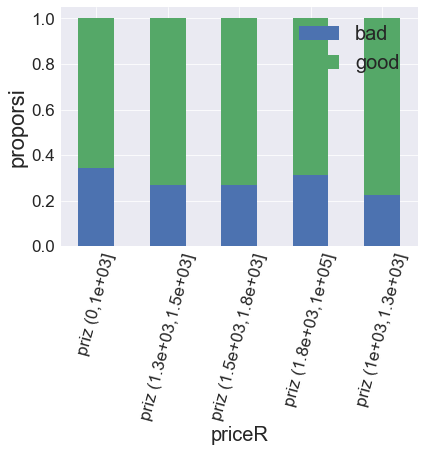

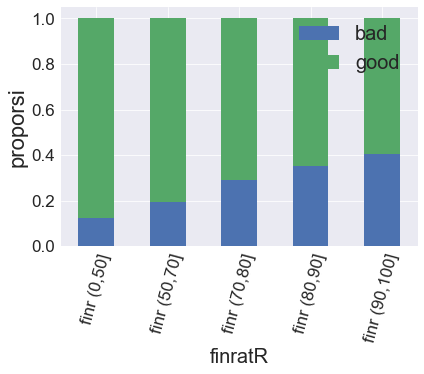

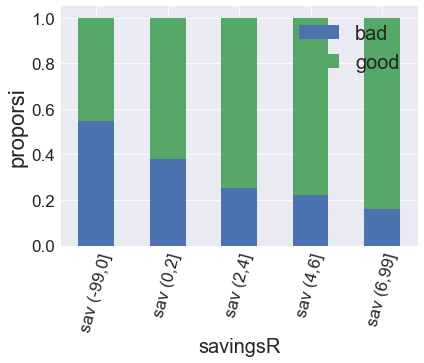

In [11]:
plt.figure(figsize=(10,20))

for i in range(1,len(KATEGORIK)):
    pd.crosstab(CleanCreditScoring[KATEGORIK[i]],CleanCreditScoring['Status'],normalize=0).plot(kind='bar',stacked=True)
    
    # mengatur ukuran huruf pada nilai-nilai di smbu x
    plt.xticks(fontsize=17,rotation=75)
    # mengatur ukuran huruf pada nilai-nilai di smbu y
    plt.yticks(fontsize=17)
    
    # mengatur ukuran huruf pada nilai-nilai di smbu x
    plt.xlabel(KATEGORIK[i],fontsize=20)
    # mengatur ukuran huruf pada nilai-nilai di smbu y
    plt.ylabel('proporsi',fontsize=22)   
    
    # mengatur keterangan
    plt.legend(fontsize=20,loc='best')
    
    plt.show() 

# Peubah Numerik

In [12]:
NUMERIK=list(CleanCreditScoring.columns[CleanCreditScoring.dtypes=='float64'])+list(CleanCreditScoring.columns[CleanCreditScoring.dtypes=='int64'])
print(NUMERIK,"\n")
print(len(NUMERIK),"\n")

['Finrat', 'Savings', 'Seniority', 'Time', 'Age', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'] 

11 



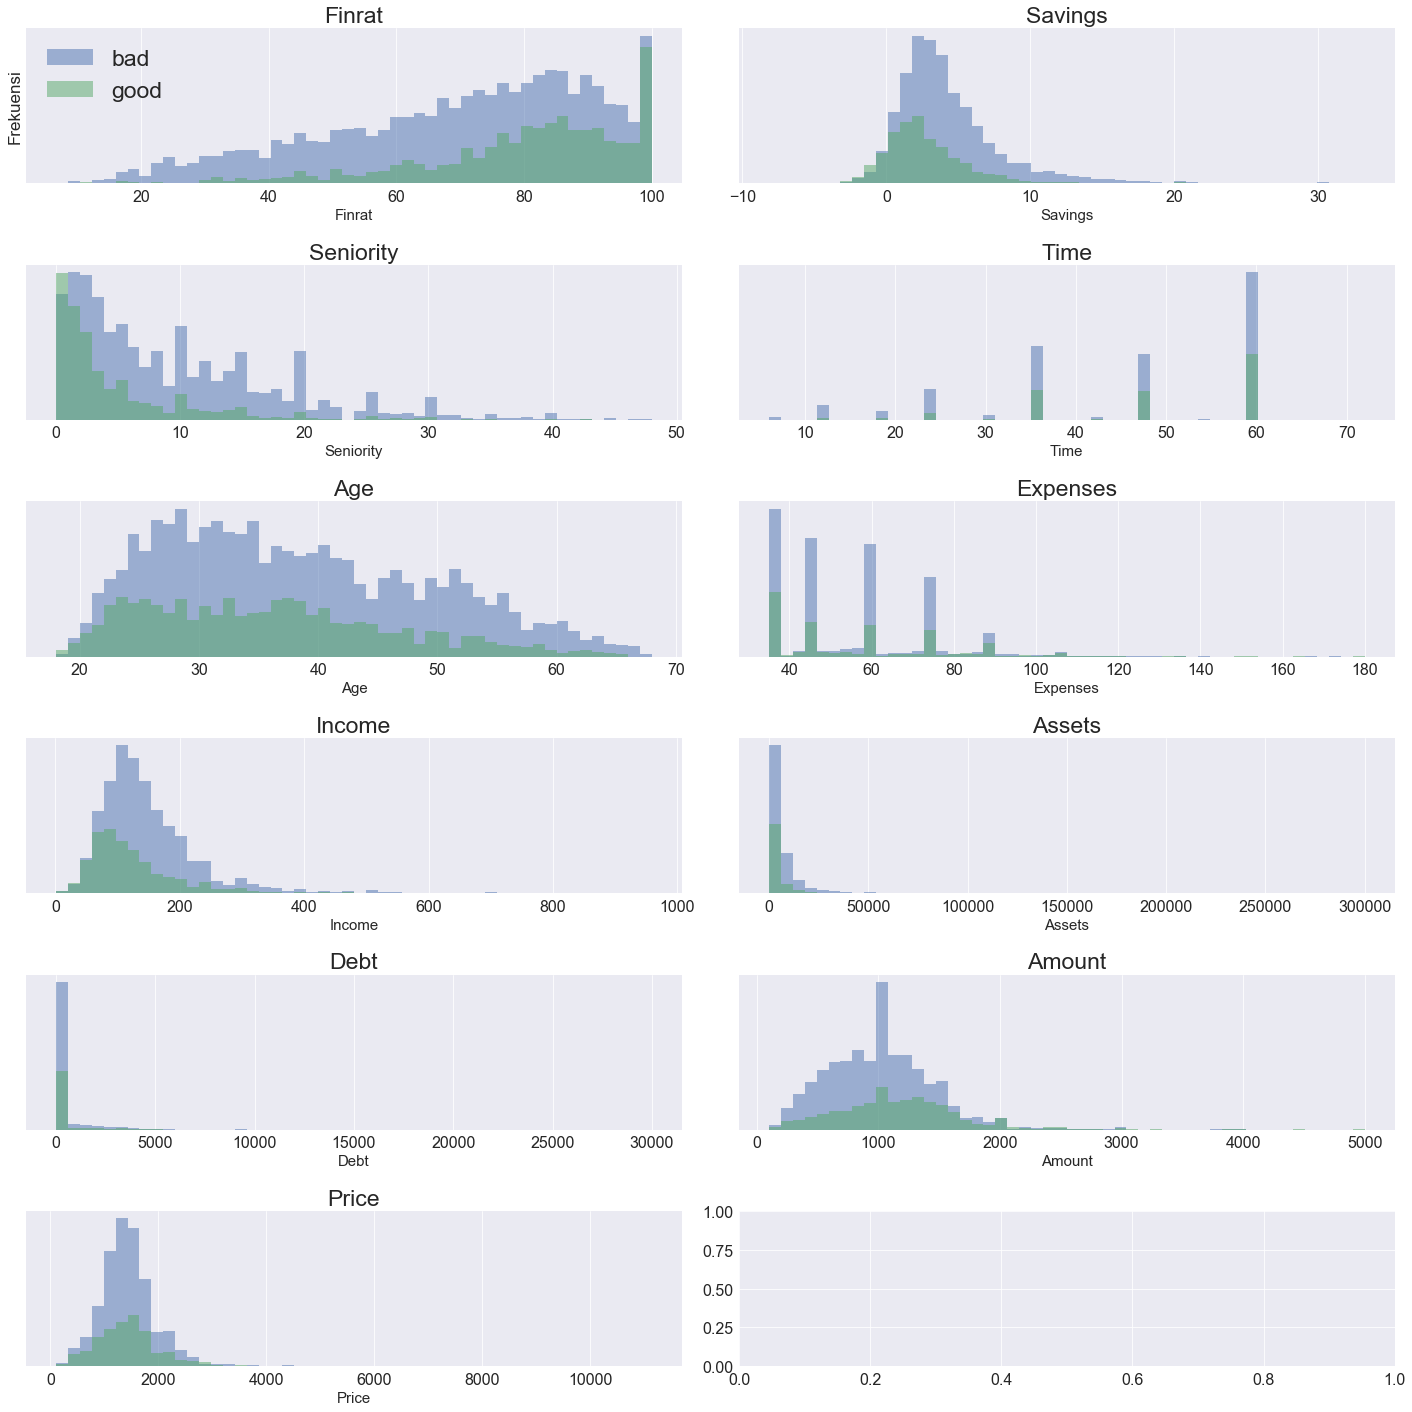

In [13]:
fig, axes = plt.subplots(6,2,figsize=(20,20))
good = CleanCreditScoring[CleanCreditScoring['Status']=='good']
bad = CleanCreditScoring[CleanCreditScoring['Status']=='bad']

ax = axes.ravel()

for i in range(len(NUMERIK)):
    _, bins = np.histogram(CleanCreditScoring[NUMERIK[i]],bins=50)
    ax[i].hist(good[NUMERIK[i]],bins=bins,alpha=0.5)
    ax[i].hist(bad[NUMERIK[i]],bins=bins,alpha=0.5)
    ax[i].set_title(NUMERIK[i],fontsize=23)
    ax[i].set_yticks(())
    ax[i].set_xlabel(NUMERIK[i],fontsize=15)

ax[0].set_ylabel("Frekuensi",fontsize=17)    
ax[0].legend(['bad','good'],loc='best',fontsize=23)
fig.tight_layout()
fig

_______________________

# PEMODELAN

______________________

# Membuat Peubah Dummy

In [14]:
print("peubah awal:\n", list(CleanCreditScoring),"\n")
CleanCreditScoring_dummies = pd.get_dummies(CleanCreditScoring,drop_first=True)
print("peubah setelah dummy dibuat:\n", list(CleanCreditScoring_dummies),"\n")

peubah awal:
 ['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records', 'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price', 'Finrat', 'Savings', 'seniorityR', 'timeR', 'ageR', 'expensesR', 'incomeR', 'assetsR', 'debtR', 'amountR', 'priceR', 'finratR', 'savingsR'] 

peubah setelah dummy dibuat:
 ['Seniority', 'Time', 'Age', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price', 'Finrat', 'Savings', 'Status_good', 'Home_other', 'Home_owner', 'Home_parents', 'Home_priv', 'Home_rent', 'Marital_married', 'Marital_separated', 'Marital_single', 'Marital_widow', 'Records_yes_rec', 'Job_freelance', 'Job_others', 'Job_partime', 'seniorityR_sen (1,3]', 'seniorityR_sen (14,99]', 'seniorityR_sen (3,8]', 'seniorityR_sen (8,14]', 'timeR_time (12,24]', 'timeR_time (24,36]', 'timeR_time (36,48]', 'timeR_time (48,99]', 'ageR_age (25,30]', 'ageR_age (30,40]', 'ageR_age (40,50]', 'ageR_age (50,99]', 'expensesR_exp (40,50]', 'expensesR_exp (50,60]', 'expensesR_exp (60,80]', 'ex

In [15]:
CleanCreditScoring_dummies.drop(['Status_good'],axis=1,inplace=True)

In [16]:
FITUR=list(CleanCreditScoring_dummies.columns)
print(len(FITUR))
FITUR

68


['Seniority',
 'Time',
 'Age',
 'Expenses',
 'Income',
 'Assets',
 'Debt',
 'Amount',
 'Price',
 'Finrat',
 'Savings',
 'Home_other',
 'Home_owner',
 'Home_parents',
 'Home_priv',
 'Home_rent',
 'Marital_married',
 'Marital_separated',
 'Marital_single',
 'Marital_widow',
 'Records_yes_rec',
 'Job_freelance',
 'Job_others',
 'Job_partime',
 'seniorityR_sen (1,3]',
 'seniorityR_sen (14,99]',
 'seniorityR_sen (3,8]',
 'seniorityR_sen (8,14]',
 'timeR_time (12,24]',
 'timeR_time (24,36]',
 'timeR_time (36,48]',
 'timeR_time (48,99]',
 'ageR_age (25,30]',
 'ageR_age (30,40]',
 'ageR_age (40,50]',
 'ageR_age (50,99]',
 'expensesR_exp (40,50]',
 'expensesR_exp (50,60]',
 'expensesR_exp (60,80]',
 'expensesR_exp (80,1e+04]',
 'incomeR_inc (110,140]',
 'incomeR_inc (140,190]',
 'incomeR_inc (190,1e+04]',
 'incomeR_inc (80,110]',
 'assetsR_asset (0,3e+03]',
 'assetsR_asset (3e+03,5e+03]',
 'assetsR_asset (5e+03,8e+03]',
 'assetsR_asset (8e+03,1e+06]',
 'debtR_debt (0,500]',
 'debtR_debt (1.5e+0

# Membagi Data Train Test

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

In [18]:
y=CleanCreditScoring['Status'].map({'good':0,'bad':1})

In [19]:
x_trainval, x_test, y_trainval, y_test = train_test_split(CleanCreditScoring_dummies[FITUR],y,random_state=0,stratify=y) 
x_train, x_val, y_train, y_val = train_test_split(x_trainval,y_trainval,random_state=0,stratify=y_trainval)

In [20]:
import mglearn

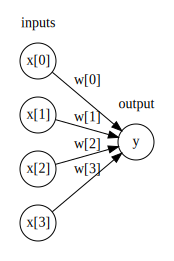

In [21]:
mglearn.plots.plot_logistic_regression_graph()

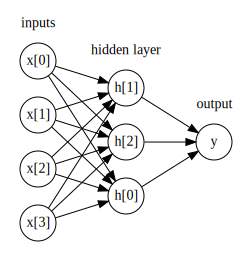

In [22]:
mglearn.plots.plot_single_hidden_layer_graph()

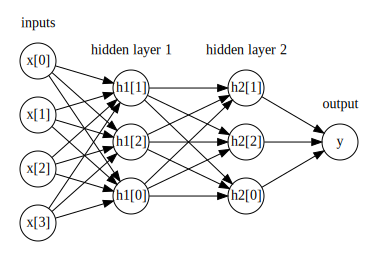

In [23]:
mglearn.plots.plot_two_hidden_layer_graph()

# MLPClassifier

In [24]:
# library ANN
from sklearn.neural_network import MLPClassifier

In [25]:
mlp = MLPClassifier(random_state=2).fit(x_train,y_train)

In [59]:
# library untuk evaluasi hasil prediksi
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, recall_score, make_scorer
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.metrics import classification_report, f1_score

# library untuk menghitung skor validasi silang
from sklearn.model_selection import cross_val_score

# library untuk melakukan validasi silang secara berstrata
from sklearn.model_selection import StratifiedKFold

In [27]:
# menampilan beberapa ukuran prediksi pada data test/uji
print("akurasi \n",accuracy_score(y_test,mlp.predict(x_test)),"\n")
print("recall \n",recall_score(y_test,mlp.predict(x_test)),"\n")
print("precision \n",precision_score(y_test,mlp.predict(x_test)),"\n")
print("confusion matrix \n",confusion_matrix(y_test,mlp.predict(x_test)),"\n")
print("classification report \n",classification_report(y_test,mlp.predict(x_test)),"\n")

akurasi 
 0.738309352518 

recall 
 0.141025641026 

precision 
 0.65671641791 

confusion matrix 
 [[777  23]
 [268  44]] 

classification report 
              precision    recall  f1-score   support

          0       0.74      0.97      0.84       800
          1       0.66      0.14      0.23       312

avg / total       0.72      0.74      0.67      1112
 



In [57]:
def eval(mlp,x_test,y_test):
    print("akurasi \n",accuracy_score(y_test,mlp.predict(x_test)),"\n")
    print("recall \n",recall_score(y_test,mlp.predict(x_test)),"\n")
    print("precision \n",precision_score(y_test,mlp.predict(x_test)),"\n")
    print("f1 score \n",f1_score(y_test,mlp.predict(x_test)),"\n")
    print("confusion matrix \n",confusion_matrix(y_test,mlp.predict(x_test)),"\n")
    print("classification report \n",classification_report(y_test,mlp.predict(x_test)),"\n")

In [30]:
mlp1 = MLPClassifier(random_state=90, 
                    hidden_layer_sizes=[10,10],
                    activation='tanh',
                    solver='lbfgs',
                    alpha=0.0001)
mlp1.fit(x_train,y_train)
eval(mlp1,x_test,y_test)

akurasi 
 0.724820143885 

recall 
 0.307692307692 

precision 
 0.516129032258 

confusion matrix 
 [[710  90]
 [216  96]] 

classification report 
              precision    recall  f1-score   support

          0       0.77      0.89      0.82       800
          1       0.52      0.31      0.39       312

avg / total       0.70      0.72      0.70      1112
 



In [31]:
mlp2 = MLPClassifier(random_state=0, 
                    hidden_layer_sizes=[100,100],
                    activation='tanh',
                    solver='lbfgs',
                    alpha=0.0001,
                    learning_rate='adaptive')
mlp2.fit(x_train,y_train)
eval(mlp2,x_test,y_test)

akurasi 
 0.723021582734 

recall 
 0.182692307692 

precision 
 0.518181818182 

confusion matrix 
 [[747  53]
 [255  57]] 

classification report 
              precision    recall  f1-score   support

          0       0.75      0.93      0.83       800
          1       0.52      0.18      0.27       312

avg / total       0.68      0.72      0.67      1112
 



In [32]:
# standardiasasi MINMAX
from sklearn.preprocessing import MinMaxScaler

In [33]:
# metode yang digunakan untuk standardisasi peubah
mm = MinMaxScaler()
# data train
mm.fit(x_train)

# standardisasi data train
x_train_mm = mm.transform(x_train)
# standardisasi data test
x_test_mm = mm.transform(x_test)

In [34]:
mlp3 = MLPClassifier(random_state=0, 
                    hidden_layer_sizes=[100,100],
                    activation='tanh',
                    solver='adam',
                    alpha=0.0001,
                    learning_rate='adaptive',
                    max_iter=200)
mlp3.fit(x_train_mm,y_train)
eval(mlp3,x_test_mm,y_test)

akurasi 
 0.795863309353 

recall 
 0.50641025641 

precision 
 0.683982683983 

confusion matrix 
 [[727  73]
 [154 158]] 

classification report 
              precision    recall  f1-score   support

          0       0.83      0.91      0.86       800
          1       0.68      0.51      0.58       312

avg / total       0.79      0.80      0.79      1112
 



In [35]:
# standardiasasi ROBUST
from sklearn.preprocessing import RobustScaler

In [36]:
# metode yang digunakan untuk standardisasi peubah
rs = RobustScaler()
# data train
rs.fit(x_train)

# standardisasi data train
x_train_rs = rs.transform(x_train)
# standardisasi data test
x_test_rs = rs.transform(x_test)

In [60]:
mlp4 = MLPClassifier(random_state=0, 
                    hidden_layer_sizes=[100,100,100],
                    activation='tanh',
                    solver='adam',
                    alpha=0.0001,
                    learning_rate='adaptive',
                    max_iter=200)
mlp4.fit(x_train_rs,y_train)
eval(mlp4,x_test_rs,y_test)

akurasi 
 0.773381294964 

recall 
 0.413461538462 

precision 
 0.651515151515 

f1 score 
 0.505882352941 

confusion matrix 
 [[731  69]
 [183 129]] 

classification report 
              precision    recall  f1-score   support

          0       0.80      0.91      0.85       800
          1       0.65      0.41      0.51       312

avg / total       0.76      0.77      0.76      1112
 



# Tunning

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline

skf = StratifiedKFold(n_splits=10)

est = MLPClassifier()
rs = RobustScaler()
pipe_mlp = Pipeline([('scale',rs),('est',est)])

parameter_space = {
    'est__hidden_layer_sizes': [(50,50,50), (100,100,100), (500,500,500)],
    'est__activation': ['tanh', 'relu'],
    'est__solver': ['sgd', 'adam'],
    'est__alpha': [0.0001, 0.05],
    'est__learning_rate': ['constant','adaptive']
}

clf = GridSearchCV(pipe_mlp,
                   parameter_space,
                   scoring = ['roc_auc','f1','recall','precision','accuracy'],
                   refit = 'f1',
                   n_jobs=4,
                   cv=skf)
clf.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('est', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), lea...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'est__hidden_layer_sizes': [(50, 50, 50), (100, 100, 100), (500, 500, 500)], 'est__activation': ['tanh', 'relu'], 'est__solver': ['sgd', 'adam'], 'est__alpha': [0.0001, 0.05], 'est__learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['roc_auc', 'f1', 'recall', 'precision', 'accuracy'],
       verbose=0

In [40]:
HasilCV=pd.DataFrame(clf.cv_results_)

In [41]:
HasilCV.shape

(48, 135)

In [42]:
clf.best_params_

{'est__activation': 'relu',
 'est__alpha': 0.05,
 'est__hidden_layer_sizes': (500, 500, 500),
 'est__learning_rate': 'adaptive',
 'est__solver': 'adam'}

In [43]:
clf.best_score_

0.56360183011488085

In [61]:
eval(clf,x_test,y_test)

akurasi 
 0.685251798561 

recall 
 0.625 

precision 
 0.455607476636 

f1 score 
 0.527027027027 

confusion matrix 
 [[567 233]
 [117 195]] 

classification report 
              precision    recall  f1-score   support

          0       0.83      0.71      0.76       800
          1       0.46      0.62      0.53       312

avg / total       0.72      0.69      0.70      1112
 



In [52]:
list(HasilCV)

['mean_fit_time',
 'mean_score_time',
 'mean_test_accuracy',
 'mean_test_f1',
 'mean_test_precision',
 'mean_test_recall',
 'mean_test_roc_auc',
 'mean_train_accuracy',
 'mean_train_f1',
 'mean_train_precision',
 'mean_train_recall',
 'mean_train_roc_auc',
 'param_est__activation',
 'param_est__alpha',
 'param_est__hidden_layer_sizes',
 'param_est__learning_rate',
 'param_est__solver',
 'params',
 'rank_test_accuracy',
 'rank_test_f1',
 'rank_test_precision',
 'rank_test_recall',
 'rank_test_roc_auc',
 'split0_test_accuracy',
 'split0_test_f1',
 'split0_test_precision',
 'split0_test_recall',
 'split0_test_roc_auc',
 'split0_train_accuracy',
 'split0_train_f1',
 'split0_train_precision',
 'split0_train_recall',
 'split0_train_roc_auc',
 'split1_test_accuracy',
 'split1_test_f1',
 'split1_test_precision',
 'split1_test_recall',
 'split1_test_roc_auc',
 'split1_train_accuracy',
 'split1_train_f1',
 'split1_train_precision',
 'split1_train_recall',
 'split1_train_roc_auc',
 'split2_test_a

In [53]:
HasilCV.to_csv('hasil tunning MLP.csv')

In [54]:
HasilCV.head()

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall,mean_test_roc_auc,mean_train_accuracy,mean_train_f1,mean_train_precision,...,std_test_accuracy,std_test_f1,std_test_precision,std_test_recall,std_test_roc_auc,std_train_accuracy,std_train_f1,std_train_precision,std_train_recall,std_train_roc_auc
0,16.848310,0.033124,0.793641,0.558893,0.694166,0.470604,0.803574,0.800641,0.575510,0.716520,...,0.019635,0.062420,0.037296,0.073557,0.034382,0.005058,0.012156,0.012831,0.013034,0.008371
1,8.312918,0.035250,0.763347,0.507914,0.611012,0.439693,0.775525,0.885640,0.765552,0.870075,...,0.023096,0.062847,0.056588,0.077712,0.044007,0.063797,0.139200,0.115124,0.150500,0.064761
2,9.885515,0.020346,0.790642,0.547697,0.693693,0.455674,0.802700,0.800207,0.570098,0.720568,...,0.014608,0.052909,0.027944,0.065467,0.030199,0.005955,0.020604,0.010245,0.025326,0.009421
3,5.878163,0.022331,0.758848,0.500486,0.596034,0.434429,0.766718,0.898039,0.792513,0.894802,...,0.032471,0.080508,0.080684,0.085680,0.049975,0.061138,0.132686,0.114433,0.143415,0.065558
4,24.893742,0.056848,0.790342,0.543696,0.695119,0.449305,0.805622,0.801474,0.569370,0.728817,...,0.018463,0.059188,0.033843,0.069905,0.030766,0.005027,0.016893,0.007590,0.020832,0.006723


In [55]:
HasilCVt=HasilCV.transpose()

In [56]:
HasilCVt

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
mean_fit_time,16.8483,8.31292,9.88552,5.87816,24.8937,14.4372,27.4054,17.5347,147.974,141.414,...,5.22662,0.655646,5.24617,1.3823,13.4559,1.53559,57.8054,35.3688,118.066,27.9146
mean_score_time,0.0331243,0.0352498,0.0203463,0.022331,0.0568484,0.0602763,0.0595015,0.0674622,0.367965,0.384861,...,0.02234,0.0164575,0.0286238,0.0258308,0.0328108,0.0282242,0.26918,0.27666,0.296606,0.284738
mean_test_accuracy,0.793641,0.763347,0.790642,0.758848,0.790342,0.763647,0.792442,0.757948,0.793941,0.764847,...,0.732454,0.770546,0.721956,0.758248,0.740552,0.772945,0.714757,0.755549,0.718956,0.739352
mean_test_f1,0.558893,0.507914,0.547697,0.500486,0.543696,0.503237,0.549906,0.512045,0.546358,0.525498,...,0.112625,0.526833,0.0618364,0.563357,0.164075,0.558425,0.0559518,0.549801,0,0.563602
mean_test_precision,0.694166,0.611012,0.693693,0.596034,0.695119,0.607414,0.700198,0.595032,0.7114,0.604901,...,0.201553,0.635703,0.176784,0.601919,0.205868,0.630654,0.0947389,0.586843,0,0.549192
mean_test_recall,0.470604,0.439693,0.455674,0.434429,0.449305,0.43545,0.455689,0.453572,0.446092,0.468473,...,0.0929301,0.466356,0.0535227,0.563399,0.139753,0.519639,0.0405784,0.536751,0,0.601991
mean_test_roc_auc,0.803574,0.775525,0.8027,0.766718,0.805622,0.775905,0.813206,0.760486,0.809964,0.781392,...,0.664441,0.759128,0.647659,0.764234,0.703669,0.766636,0.688338,0.768923,0.691191,0.766299
mean_train_accuracy,0.800641,0.88564,0.800207,0.898039,0.801474,0.895073,0.801007,0.90974,0.797908,0.891442,...,0.733086,0.788307,0.726084,0.781177,0.744917,0.805243,0.717428,0.871333,0.718956,0.840547
mean_train_f1,0.57551,0.765552,0.570098,0.792513,0.56937,0.783293,0.56984,0.810908,0.558255,0.779135,...,0.109428,0.572279,0.0716188,0.613045,0.176454,0.627305,0.0606846,0.766442,0,0.736242
mean_train_precision,0.71652,0.870075,0.720568,0.894802,0.728817,0.886762,0.72567,0.914813,0.723317,0.871404,...,0.215462,0.685076,0.156172,0.641821,0.217792,0.701946,0.100566,0.814605,0,0.725138
